# Regression :- Prediction Of Store Sales 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\Data Science\Course 10\DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(14204, 12)

In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
store = df

#  EDA

In [9]:
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


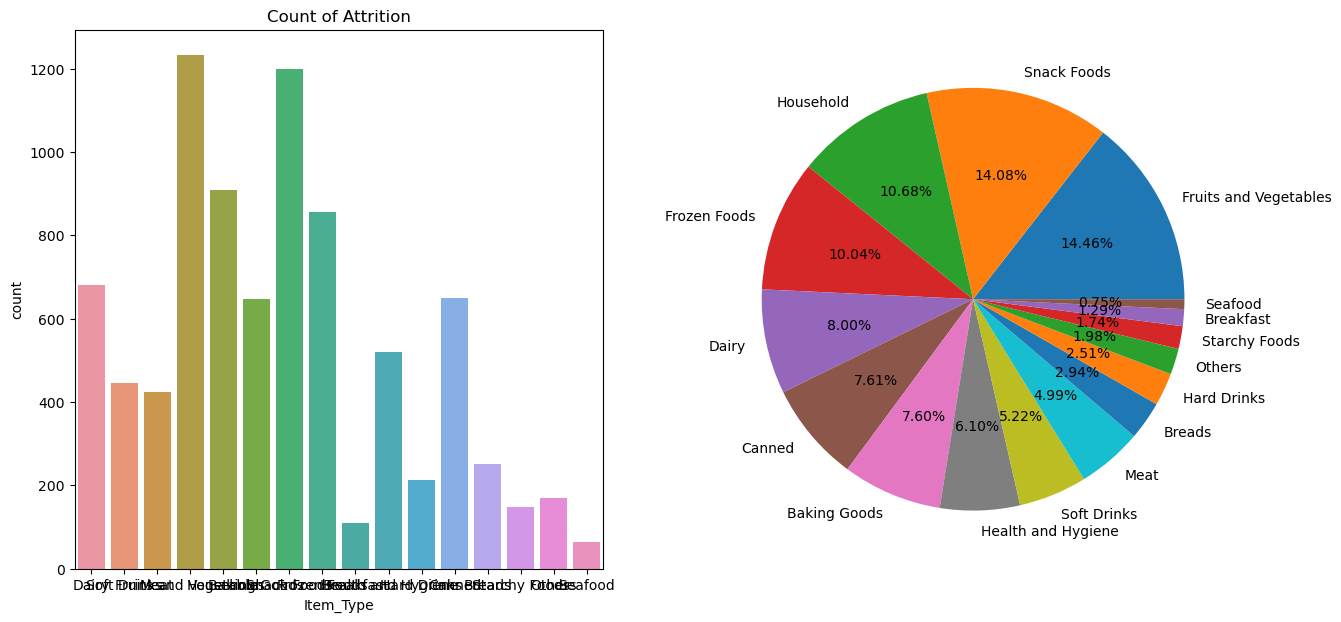

In [10]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition")                  # Set the title of the graph
percentage = df["Item_Type"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Item_Type"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Item_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie
plt.show()

['Low Fat' 'Regular']


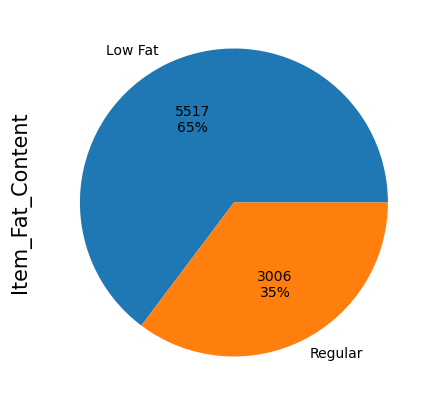

In [11]:
# Pie charts of categorical features
labels=df['Item_Fat_Content'].unique()
print(labels)
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(10, 5))

#plt.pie(income_df_c['purpose_encode'])
df.groupby(df['Item_Fat_Content']).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, ax=ax)
ax.set_ylabel('Item_Fat_Content', size=15)
# show plot
plt.show()

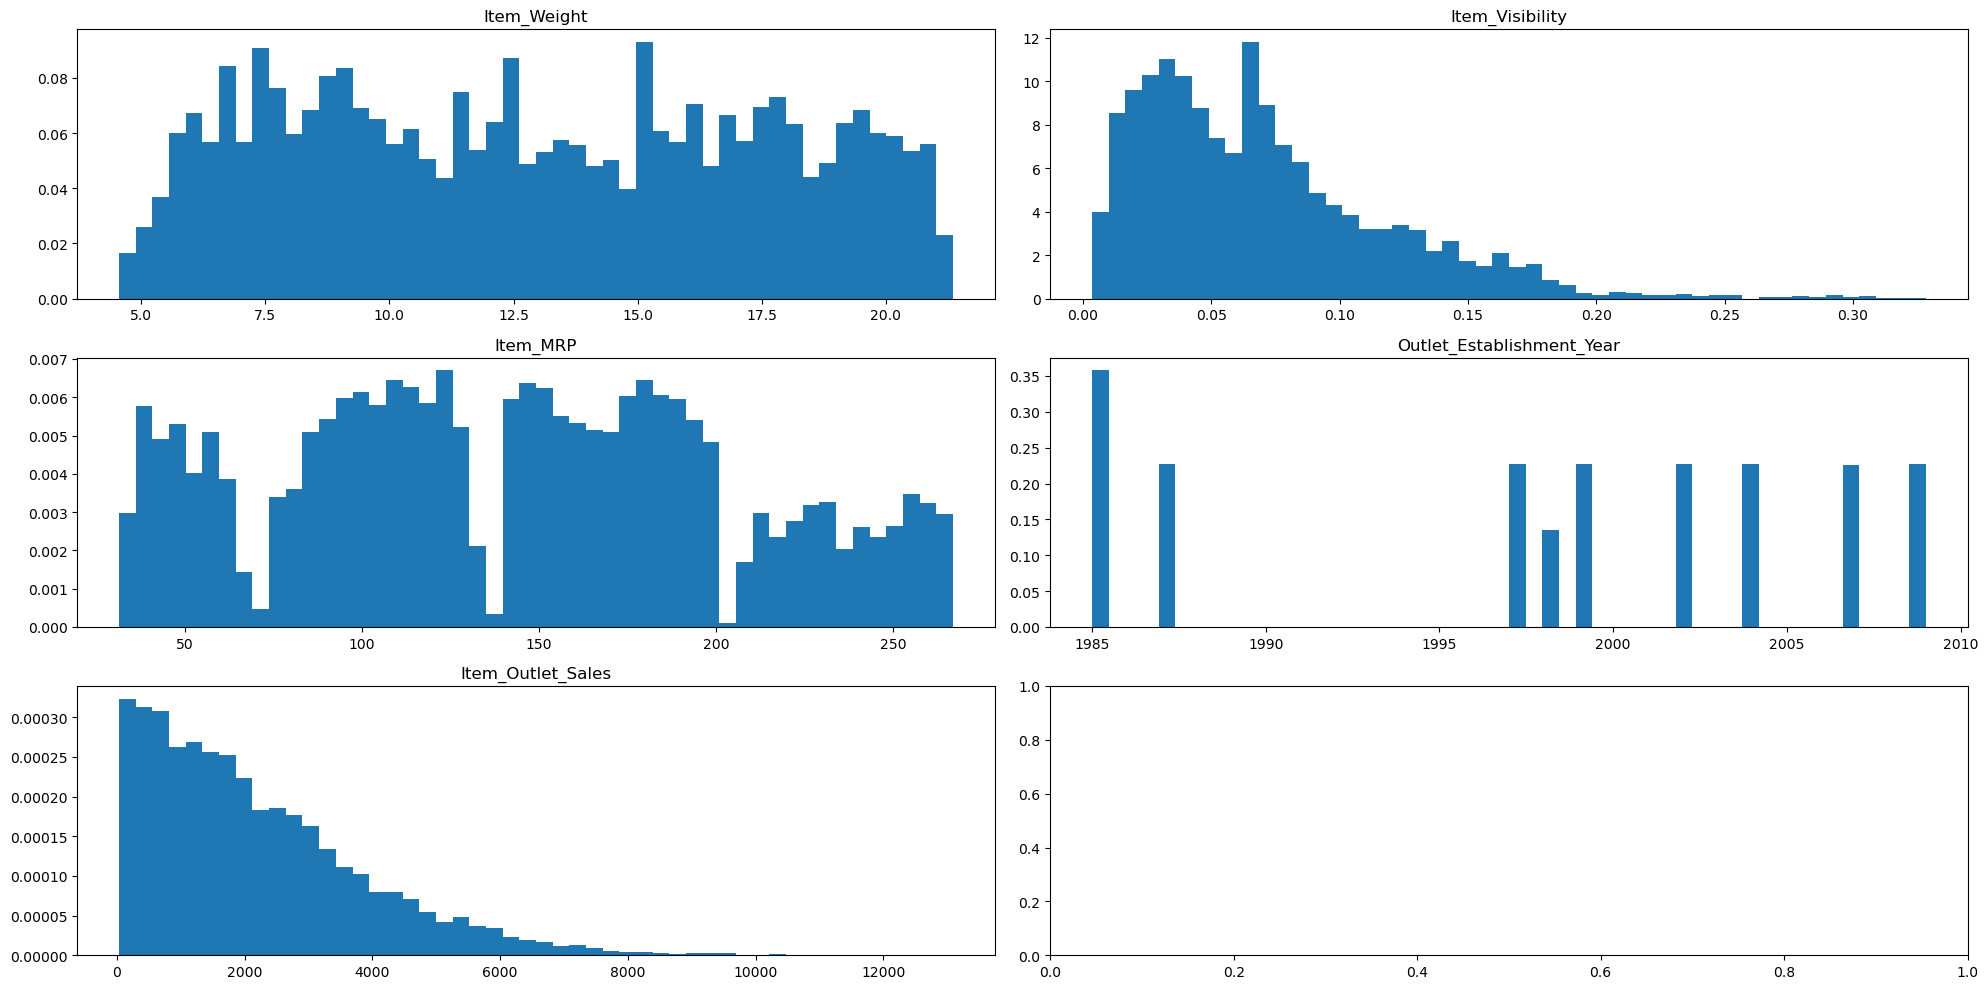

In [12]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = df.select_dtypes(include=numerics)
numeric_cols=new_df.columns
num_cols=2
n_bins = 50

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

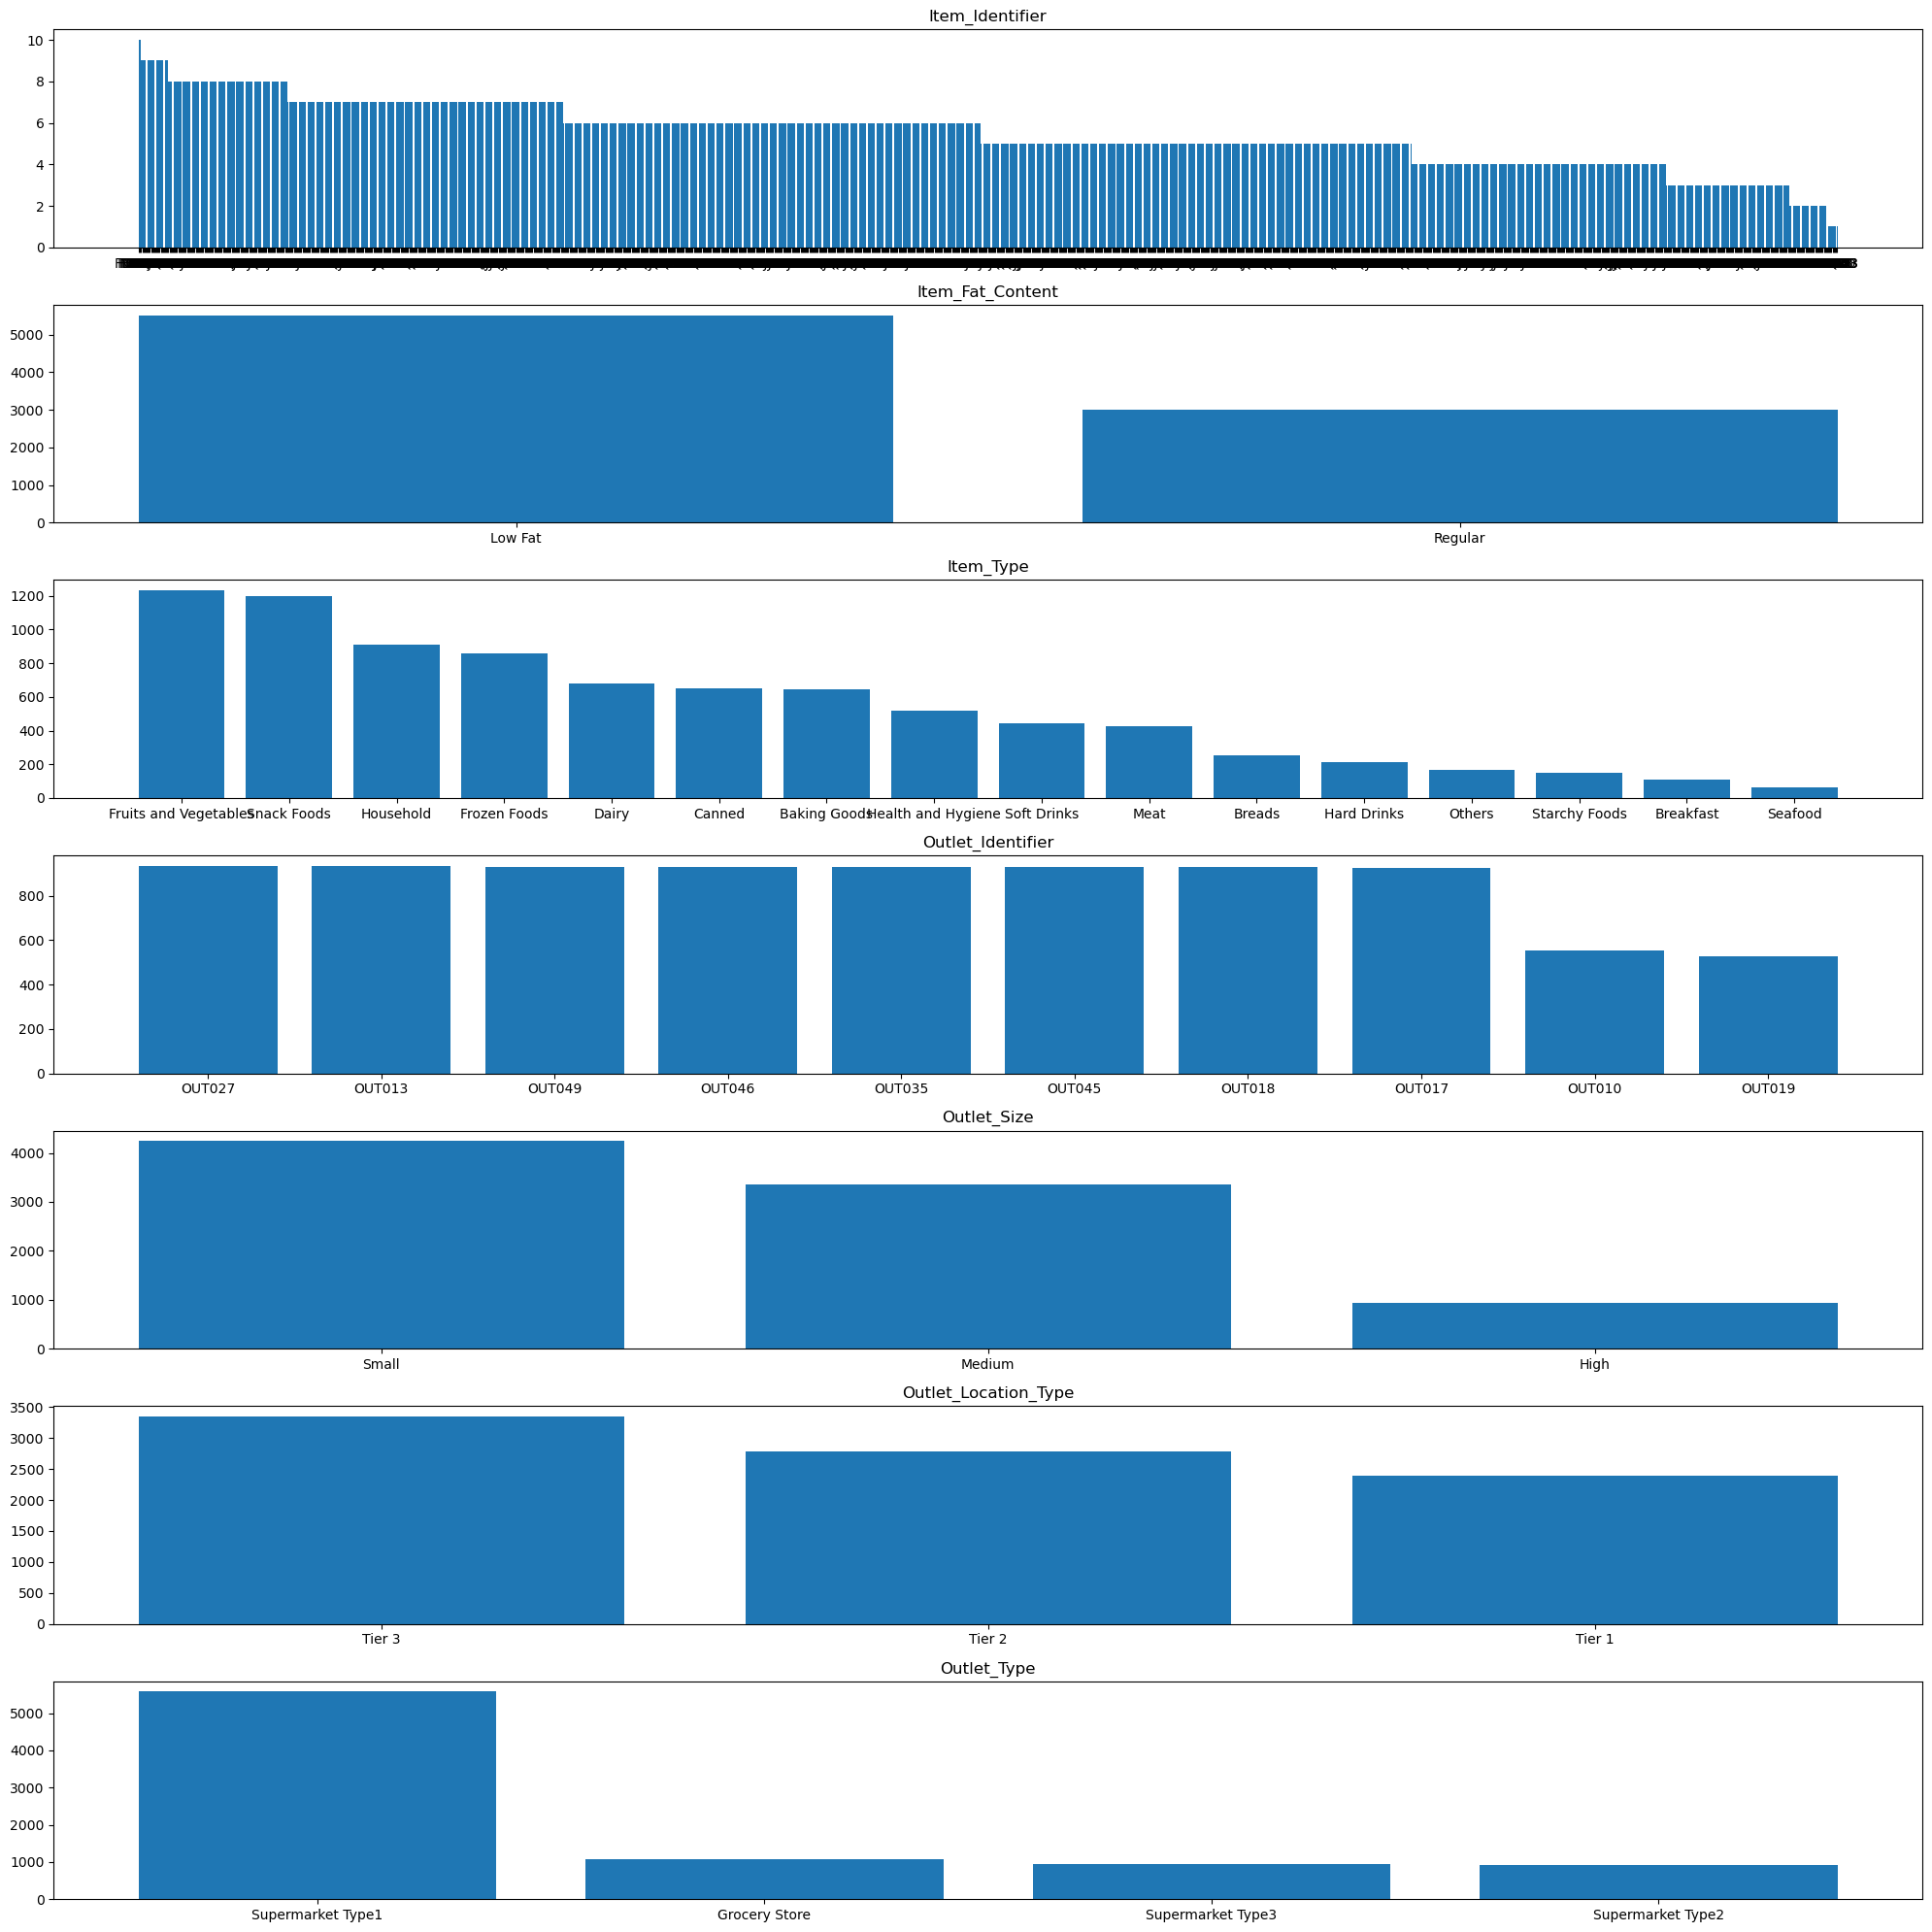

In [13]:
# Histogram of all categorical features
num_cols = 1
cat_df = df.select_dtypes('object')
categorical_cols=cat_df.columns

# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True, figsize=(20,20))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_df[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join((str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
    
plt.show()

In [14]:
import matplotlib.pyplot as plt

def plot_scatter(df, X, y,color='violet'):
    
    plt.scatter(df[X], df[y], color= color)
    plt.xlabel(X)
    plt.ylabel(y)
    plt.show()

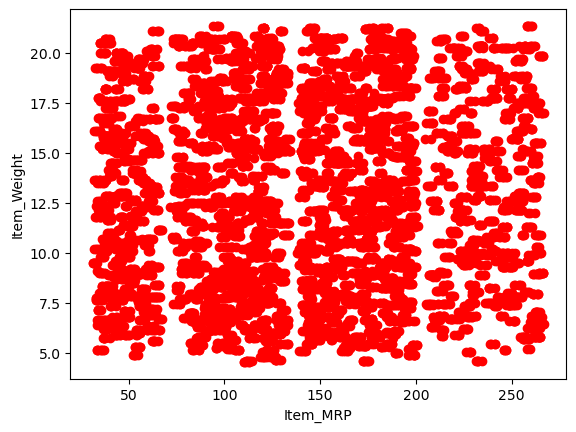

In [15]:
plot_scatter(df, "Item_MRP", "Item_Weight", color='red')

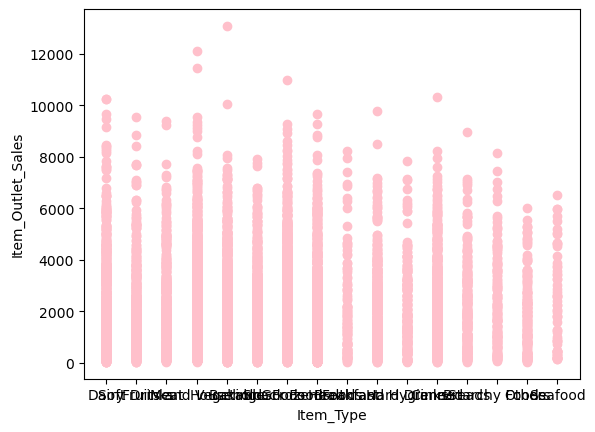

In [16]:
plot_scatter(df, "Item_Type", "Item_Outlet_Sales", color = "pink")

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


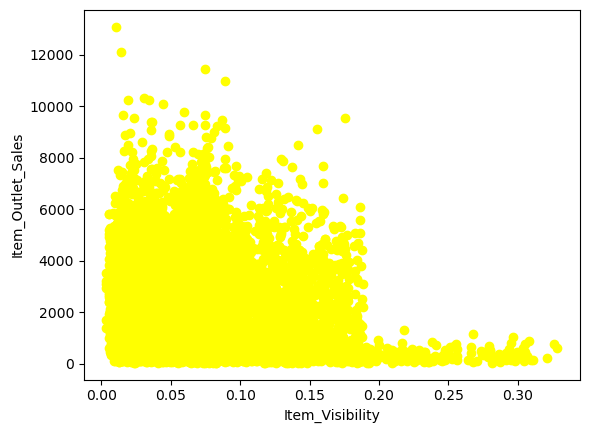

In [18]:
plot_scatter(df, "Item_Visibility", "Item_Outlet_Sales", color="yellow")

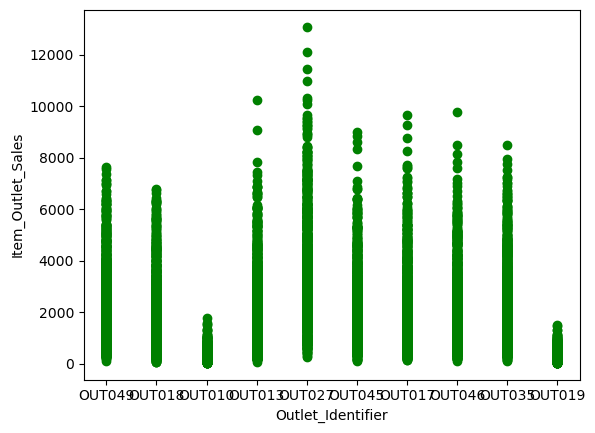

In [19]:
plot_scatter(df, "Outlet_Identifier", "Item_Outlet_Sales", color="green")

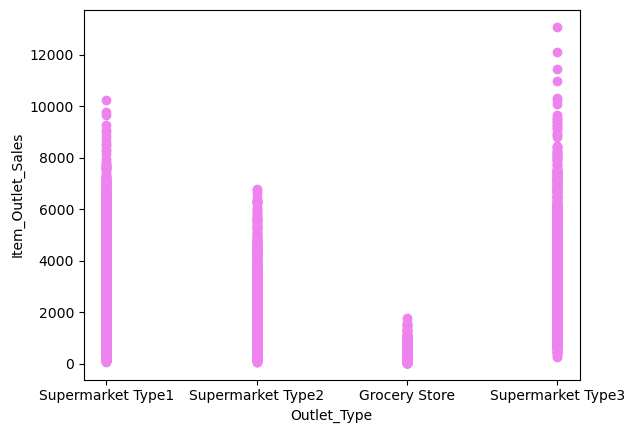

In [20]:
plot_scatter(df, "Outlet_Type", "Item_Outlet_Sales", color = "violet")

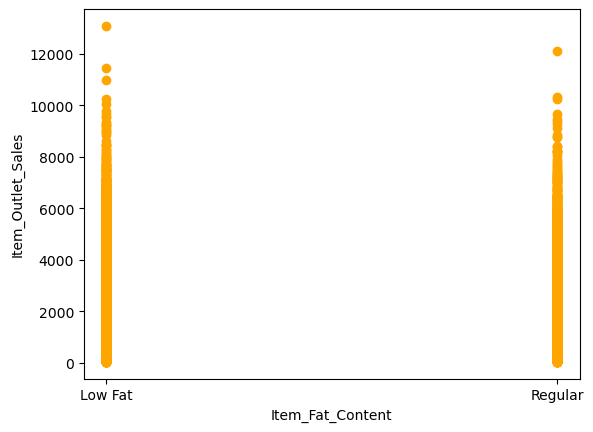

In [21]:
plot_scatter(df, "Item_Fat_Content", "Item_Outlet_Sales", color="orange")

# Data Preprocessing 

## Label encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [25]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

## finding outlier

In [26]:
z_scores = np.abs((df -  df.mean()) / df.std())

# Identify outliers using a threshold
threshold = 3
outliers = df[z_scores > threshold]

In [27]:
outliers.sum()

Item_Identifier                   0.000000
Item_Weight                       0.000000
Item_Fat_Content                  0.000000
Item_Visibility                  25.712405
Item_Type                         0.000000
Item_MRP                          0.000000
Outlet_Identifier                 0.000000
Outlet_Establishment_Year         0.000000
Outlet_Size                       0.000000
Outlet_Location_Type              0.000000
Outlet_Type                       0.000000
Item_Outlet_Sales            761257.743400
dtype: float64

### very less outlier in features thats why avoiding outlier treatment

## Correlation 

In [28]:
column_correlation = df.corr()
column_correlation

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.048366,-0.114660,-0.029442,-0.017973,0.012853,-0.008602,-0.012772,-0.002556,0.003656,-0.001178,0.002869
Item_Weight,0.048366,1.000000,-0.027166,-0.018409,0.035973,0.026172,-0.007568,-0.012823,-0.013371,0.002929,0.000298,0.013261
Item_Fat_Content,-0.114660,-0.027166,1.000000,0.049815,-0.139434,0.006063,0.000764,0.003151,-0.001369,-0.001598,0.002199,0.018719
Item_Visibility,-0.029442,-0.018409,0.049815,1.000000,-0.036094,-0.005861,-0.105722,-0.080598,0.031617,-0.029109,-0.178473,-0.135247
Item_Type,-0.017973,0.035973,-0.139434,-0.036094,1.000000,0.032651,0.001656,0.004970,-0.000394,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.026172,0.006063,-0.005861,0.032651,1.000000,0.003319,0.005020,0.001215,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007568,0.000764,-0.105722,0.001656,0.003319,1.000000,0.079035,0.423653,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.012823,0.003151,-0.080598,0.004970,0.005020,0.079035,1.000000,0.428367,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.002556,-0.013371,-0.001369,0.031617,-0.000394,0.001215,0.423653,0.428367,1.000000,-0.590686,-0.260467,-0.060517
Outlet_Location_Type,0.003656,0.002929,-0.001598,-0.029109,0.003084,0.000232,-0.716176,-0.089216,-0.590686,1.000000,0.467219,0.089367


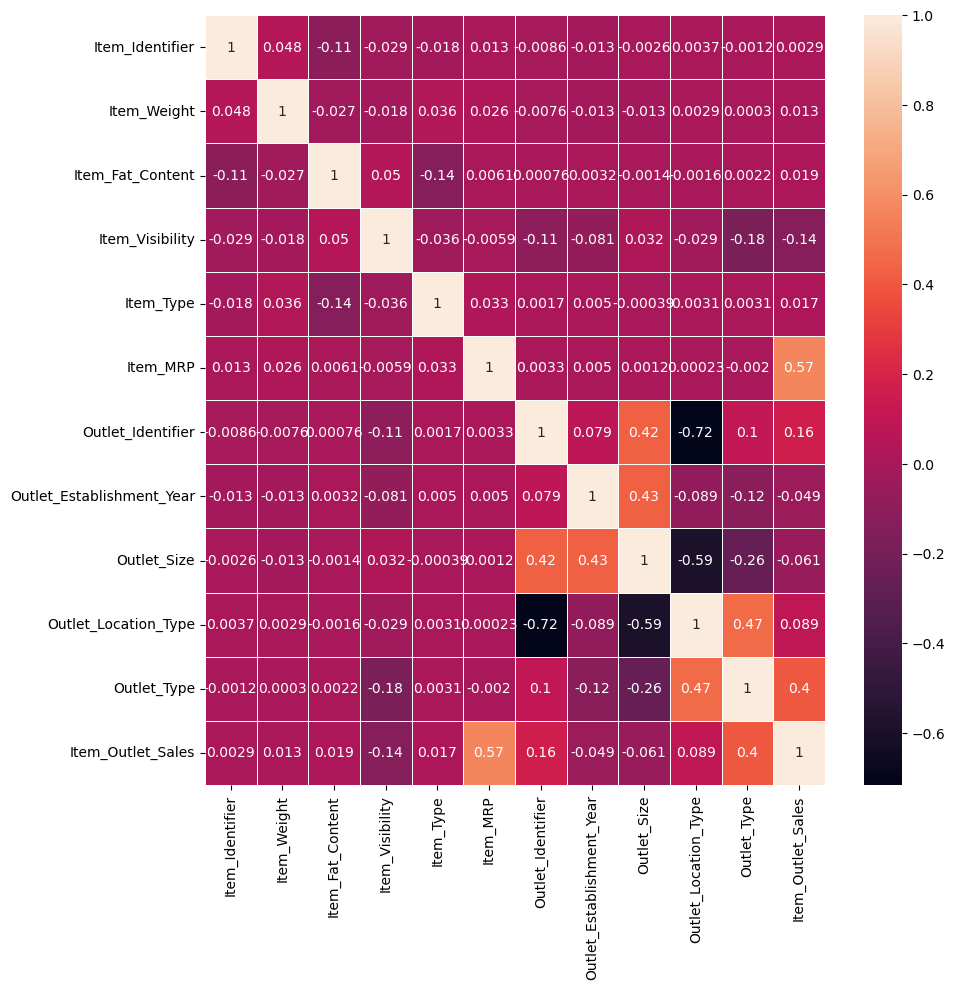

In [29]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(column_correlation,annot=True,linewidths=.5, ax=ax)

plt.show()

In [30]:
store.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


## Split the data into train and test

In [31]:
X = df.loc[:,['Item_Identifier', 'Item_Weight', 'Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]            # storing into x and y
y = df.loc[:,['Item_Outlet_Sales']]

In [32]:
from sklearn.model_selection import train_test_split   # for splitting the data into train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)   

## scaling the data

In [33]:
# scaling the data using MinMax Scaling process
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
scaler = MinMaxScaler() #standard
X_train = scaler.fit_transform(X_train)
#X_train=X_train(scale)
X_train

X_test = scaler.fit_transform(X_test)
X_test

array([[0.31258023, 0.57935561, 0.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.89345315, 0.19928401, 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [0.15661104, 0.59128878, 1.        , ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.15661104, 0.59128878, 1.        , ..., 0.        , 1.        ,
        0.33333333],
       [0.75481386, 0.31085919, 1.        , ..., 0.5       , 1.        ,
        0.66666667],
       [0.16238768, 0.19779236, 0.        , ..., 1.        , 0.5       ,
        0.33333333]])

In [34]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Model fitting and Model Evaluation

## 1. Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [36]:
model = LinearRegression()

In [37]:
s1=model.fit(X_train,y_train)

In [38]:
s = s1.score(X_train,y_train)
print("Coeffiecient of determination",s)

Coeffiecient of determination 0.4976654650462309


In [39]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=s1.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(r2)
print(mse)

0.5204628034878942
1303367.7459492043


# 2. Kfold

In [40]:
from sklearn.model_selection import KFold, cross_val_score

In [41]:
kf = KFold(n_splits=10, shuffle = True, random_state=42)

In [52]:
# Evaluate the model using cross-validation
scores = cross_val_score(model,  X,y,cv=kf, scoring='neg_mean_squared_error')
scores1 = cross_val_score(model, X,y, cv=kf, scoring='r2')

rmse = np.sqrt(-scores.mean())
r2=np.sqrt(scores1.mean())

# Print the RMSE
print("RMSE: %.3f" % rmse)
print("r2", r2)

RMSE: 1205.393


## Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
m = DecisionTreeRegressor(max_depth=7, min_samples_split=6)

In [45]:
s = m.fit(X_train, y_train)
Y_pred3 = s.predict(X_test) 

In [46]:
Y_pred3

array([1360.67104289,  658.91138771,  658.91138771, ...,  658.91138771,
        748.3664765 , 1683.81703805])

In [47]:
mse = mean_squared_error(y_test, Y_pred3)
r2 = r2_score(y_test, Y_pred3)
print(mse)
print(r2)

1190057.722491501
0.5621520129642701


## Stacking

In [48]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

# Create base models
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=6)
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
ab = AdaBoostRegressor(base_estimator=dt, n_estimators=10, learning_rate=0.1)

# Train the base models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)

# Generate predictions for the training data
lr_train_pred = lr.predict(X_train)
dt_train_pred = dt.predict(X_train)
rf_train_pred = rf.predict(X_train)
ab_train_pred = ab.predict(X_train)

# Generate predictions for the testing data
lr_test_pred = lr.predict(X_test)
dt_test_pred = dt.predict(X_test)
rf_test_pred = rf.predict(X_test)
ab_test_pred = ab.predict(X_test)

# Create the stacked dataset
stacked_train = np.column_stack((lr_train_pred, dt_train_pred, rf_train_pred, ab_train_pred))
stacked_test = np.column_stack((lr_test_pred, dt_test_pred, rf_test_pred, ab_test_pred))

# Train the meta-regressor
meta_regressor = LinearRegression()
meta_regressor.fit(stacked_train, y_train)

# Generate predictions for the testing data using the stacked model
stacked_pred = meta_regressor.predict(stacked_test)

# Calculate the R^2 score
r2 = r2_score(y_test, stacked_pred)
print("R^2 score:", r2)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23172\3749959260.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


R^2 score: 0.6160475695908281


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Models 	R2 
	
Linear Regression	0.52
 Kfold	0.54
Decision Tree Regressor	0.56
 Stacking	0.61
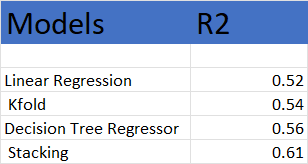

### Interpretation : Based on the R-squared values you have provided, it seems that the stacking model has the highest performance with an R-squared value of 0.61, followed by the Decision Tree Regressor with an R-squared value of 0.56. The K-fold model and Linear Regression have lower R-squared values of 0.54 and 0.52, respectively.